# Versuch 245: Induktion

## Auswertung der Messergebnisse

In [1]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
%matplotlib inline 
plt.rcParams["figure.figsize"][0] = 14
plt.rcParams["figure.figsize"][1] = 9
plt.rcParams['errorbar.capsize']=2

In [2]:
#fit functions

#linear function
def linear(x,a,b):
    return a*x+b

#linear function, f(0)=0
def linear0(x,a):
    return a*x

#abs(cos)
def cos_fit(x,C):
    return abs(C*np.cos(x*2*np.pi/360))

### Teil 1: Induktionsgesetz

#### Frequenzabhängigkeit

In [3]:
#load data with errors according to the manufacturer
U_ind=0.5*np.array([1.84, 4.32, 6.08, 8.4, 7.84])
U_ind_err=np.sqrt((0.03*U_ind)**3+(0.5*np.ones(5)*2/25)**2)

f=np.array([3.13, 6.06, 9.09, 11.9, 15.1])
f_err=0.03*f

I_s = 4
I_s_err = 0.05

#Fit linear function to data (linear part)
popt1,pcov1=curve_fit(linear0,f[0:4],U_ind[0:4],sigma=U_ind_err[0:4])
perr1 = np.sqrt(np.diag(pcov1))

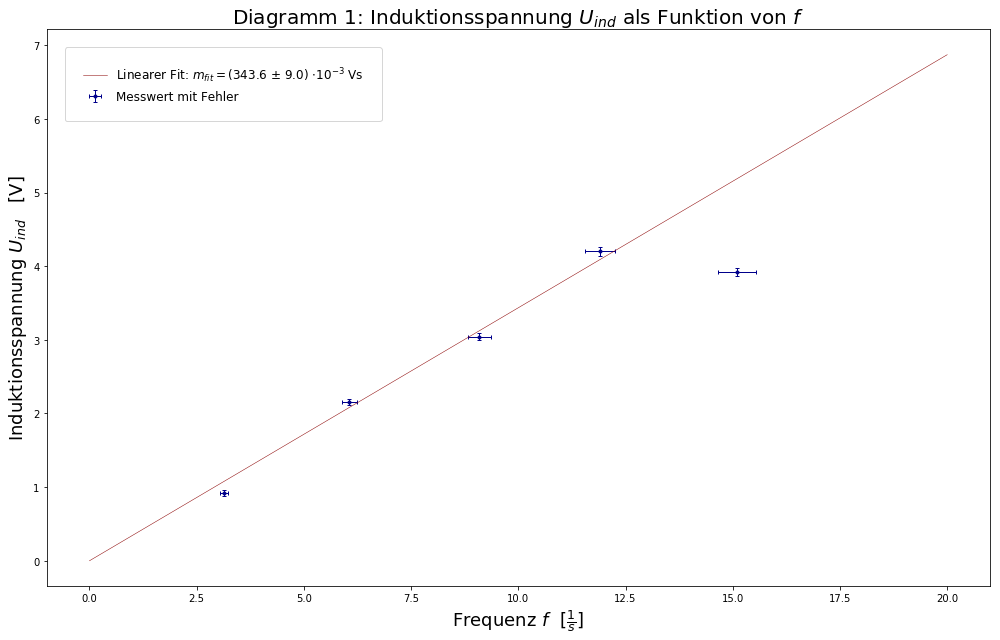

In [4]:
#plot data and funtion
plt.errorbar(f, U_ind, xerr=f_err, yerr=U_ind_err,linewidth=1,linestyle='',marker='.',color='darkblue', label='Messwert mit Fehler')
plt.plot(np.linspace(0,20,10),linear0(np.linspace(0,20,10),*popt1),linewidth=0.5,color='darkred',label='Linearer Fit: $m_{fit} = ($' + str(round(popt1[0]*1e3,1)) + ' $\pm$ ' + str(round(pcov1[0,0]**0.5*1e3,1)) + r') $\cdot10^{-3}$ Vs')
plt.xlabel(r'Frequenz $f$  [$\frac{1}{s}$]', size=18)
plt.ylabel(r'Induktionsspannung $ U_{ind}$   [V]', size=18)
plt.title(r'Diagramm 1: Induktionsspannung $U_{ind} $ als Funktion von $f$', size=20)
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)

#save plot
plt.tight_layout()
plt.savefig('Diagramme/V245Diagramm1.pdf', format='PDF')

In [5]:
#fit quality
chi_squared1=np.sum((linear0(f[0:4],*popt1)-U_ind[0:4])**2/U_ind_err[0:4]**2)
dof1=len(U_ind[0:4])-1
chi_squared_red1=chi_squared1/dof1
print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared1))
print('chi_squared_red= ' + str(chi_squared_red1))
print()

prob1=round(1-chi2.cdf(chi_squared1,dof1),2)*100
print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob1) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 24.5180435665
chi_squared_red= 8.17268118884

Die Fitwahrscheinlichkeit beträgt: 0.0 %


#### Abhängigkeit vom Spulenstrom

In [6]:
#Messdaten aus zweiter Messreihe 
U_ind2=0.5*np.array([0.6, 1.12, 1.44, 2.00, 2.48, 2.96, 3.40, 3.76, 4.24])
U_ind2_err=np.sqrt((0.03*U_ind2)**2+(0.5*np.array([0.5, 0.5, 0.5, 0.5, 1, 1, 1, 2, 2])/25)**2)
U_ind2_err[0:3] = np.sqrt(U_ind2_err[0:3]**2 + (0.1*U_ind2[0:3])**2)

I = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5])
I_err = 0.05

#fit linear function
popt2,pcov2=curve_fit(linear,I,U_ind2,sigma=U_ind2_err)
perr2 = np.sqrt(np.diag(pcov2))

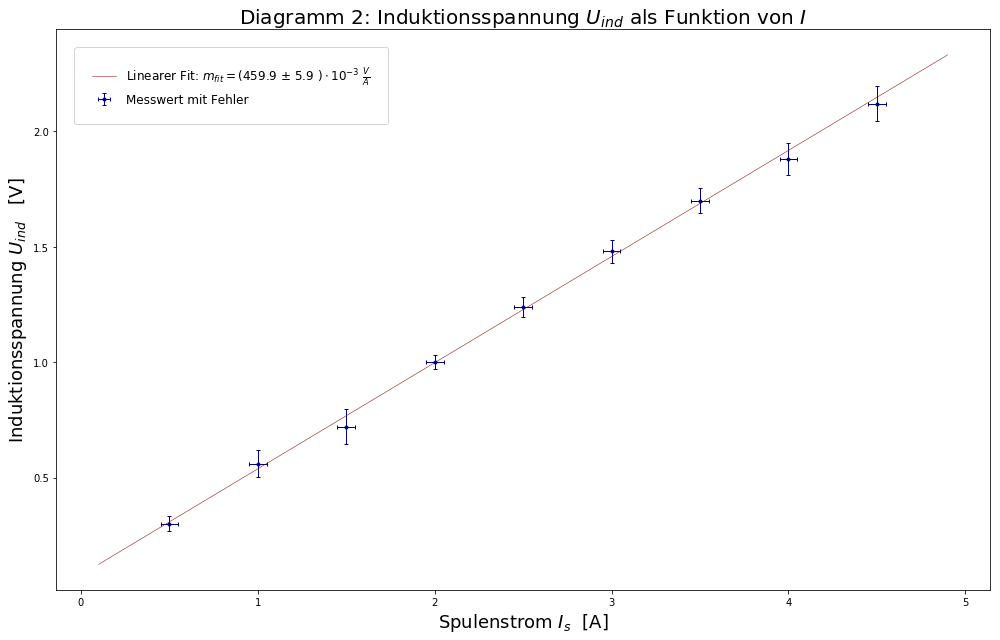

In [7]:
#Plot der Messdaten: U_ind gegen I_s
plt.errorbar(I, U_ind2, xerr=I_err, yerr=U_ind2_err,linewidth=1,linestyle='',marker='.',color='darkblue', label='Messwert mit Fehler')
plt.plot(np.linspace(0.1,4.9,10),linear(np.linspace(0.1,4.9,10),*popt2),linewidth=0.5,color='darkred',label='Linearer Fit: $m_{fit} = ($' + str(round(popt2[0]*1e3,1)) + ' $\pm$ ' + str(round(pcov2[0,0]**0.5*1e3,1)) + r' $) \cdot10^{-3} \ \frac{V}{A}$')
plt.xlabel(r'Spulenstrom $ I_s$  [A]', size=18)
plt.ylabel(r'Induktionsspannung $ U_{ind}$   [V]', size=18)
plt.title(r'Diagramm 2: Induktionsspannung $U_{ind} $ als Funktion von $I$', size=20)
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V245Diagramm2.pdf', format='PDF')

In [8]:
#fit qality
chi_squared2=np.sum((linear(I,*popt2)-U_ind2)**2/U_ind2_err**2)
dof2=len(U_ind2)-2
chi_squared_red2=chi_squared2/dof2

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared2))
print('chi_squared_red= ' + str(chi_squared_red2))
print()


prob2=round(1-chi2.cdf(chi_squared2,dof2),2)*100
print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob2) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 1.37505281725
chi_squared_red= 0.19643611675

Die Fitwahrscheinlichkeit beträgt: 99.0 %


#### Berechung des Magnetfeldes und Vergleich mit der Theorie

In [9]:
#Calculation from fit parameters

m_fit=popt1[0]
m_fit_err=perr1[0]

#We know: B=-U_ind/A/(f*2*pi)/N_Flachspule=-m_fit/2/pi/A/N_Flachspule

A=41.7e-4 #coil area
N=4000 #number of turns

B_gem=m_fit/(A*N*2*np.pi)
B_gem_err=B_gem*(m_fit_err/m_fit)

print('Für das B-Feld aus dem linearen Fit folgt:')
print('B_gem = (' + str(B_gem*1e3) + ' +/- ' + str(B_gem_err*1e3) + ') 10^-3 T')

Für das B-Feld aus dem linearen Fit folgt:
B_gem = (3.27831223854 +/- 0.0862484520611) 10^-3 T


In [10]:
#constants and information about the experiment

mu0=4*np.pi*1e-7 
N2=124 #number of turns
R=0.5*295e-3 #coil radius

#Formulae from the instruction
B_theo=(8*mu0*N2*I_s)/(np.sqrt(125)*R)
B_theo_err=B_theo*(I_s_err/I_s)

print('Für den theoretischen Wert des Magnetfeldes im Zentrum der Spulen folgt:')
print('B_theo = (' + str(B_theo*1e3) + ' +/- ' + str(B_theo_err*1e3) + ') 10^-3 T')

Für den theoretischen Wert des Magnetfeldes im Zentrum der Spulen folgt:
B_theo = (3.02367076369 +/- 0.0377958845461) 10^-3 T


In [11]:
#Vergleich Messwert-Theorie

diff_B=np.abs(B_theo-B_gem)
diff_B_err=np.sqrt((B_theo_err)**2+(B_gem_err)**2)

print('Damit ergibt sich für die Differenz aus Messwert und Theorie:')
print('∆B = (' + str(diff_B*1e3) + ' +/- ' + str(diff_B_err*1e3) + ') 10^-3 T')

Damit ergibt sich für die Differenz aus Messwert und Theorie:
∆B = (0.254641474851 +/- 0.0941664715892) 10^-3 T


### Teil 2: Induktionsspannung bei periodischem Feldstrom (Lufttransformator)

#### Induktionsspannung in Abhängigkeit vom Winkel

In [12]:
#angle
alpha=np.linspace(0,360,13)
alpha_err=3*np.ones(13)

#U_ind
U_ind3=0.5*np.array([2.16, 1.92, 1.20, 0.04, 1.21, 1.89, 2.19, 1.90, 1.18, 0.036, 1.13, 1.94, 2.20]) #Volt
U_ind3_err=0.5*(np.sqrt((0.03*U_ind3)**2+(0.5*np.ones(13)*2/25)**2))

In [13]:
p=(1)
popt3,pcov3= curve_fit(cos_fit,alpha,U_ind3, sigma=U_ind3_err,p0=p)

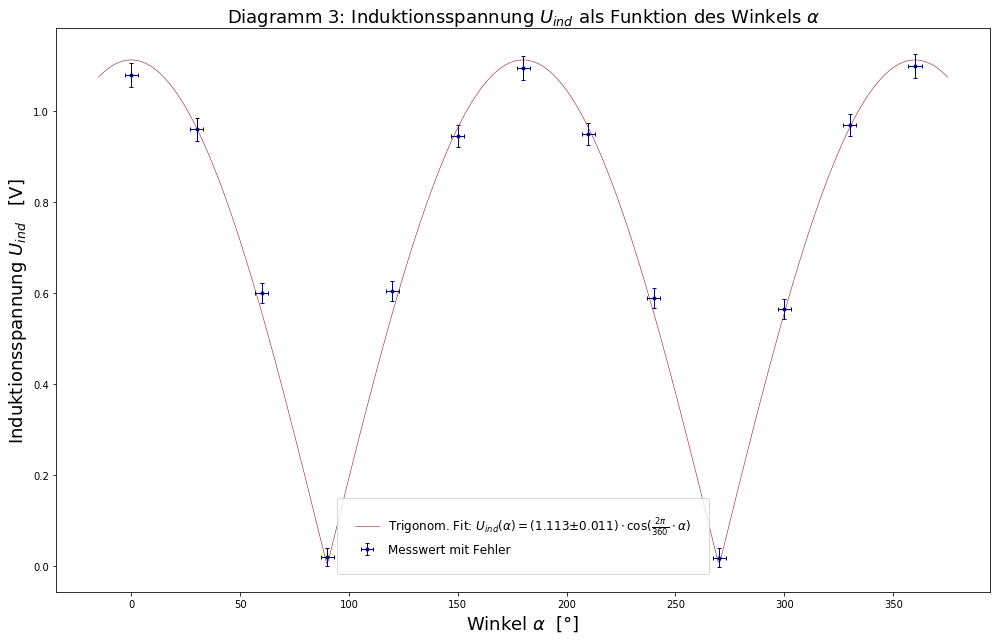

In [14]:
#Plot der Messdaten: U_ind gegen I_s
plt.errorbar(alpha, U_ind3, xerr=alpha_err, yerr=U_ind3_err,linewidth=1,linestyle='',marker='.',color='darkblue', label='Messwert mit Fehler')
plt.plot(np.linspace(-15,375,500),cos_fit(np.linspace(-15,375,500),*popt3),linewidth=0.5,color='darkred',
         label=r'Trigonom. Fit: $U_{ind}(\alpha) = ($' + str(round(popt3[0],3)) + 
         '$\pm$'+str(round(pcov3[0,0]**0.5,3)) + r'$) \cdot$cos($\frac{2\pi}{360}\cdot \alpha$)')
         
plt.xlabel(r'Winkel $ \alpha$  [°]', size=18)
plt.ylabel(r'Induktionsspannung $ U_{ind}$   [V]', size=18)
plt.title(r'Diagramm 3: Induktionsspannung $U_{ind} $ als Funktion des Winkels $\alpha$', size=18)
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V245Diagramm3.pdf', format='PDF')

In [15]:
#fit quality
chi_squared3=np.sum((cos_fit(alpha,*popt3)-U_ind3)**2/U_ind3_err**2)
dof3=len(U_ind3)-2
chi_squared_red3=chi_squared3/dof3
print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared3))
print('chi_squared_red= ' + str(chi_squared_red3))
print()


prob3=round(1-chi2.cdf(chi_squared3,dof3),2)*100
print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob3) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 16.4978727158
chi_squared_red= 1.49980661053

Die Fitwahrscheinlichkeit beträgt: 12.0 %


#### Verhältnis von induzierter zu angelegter Spannung als Funktion der Frequenz

In [16]:
#frequency
f2 = np.array([19.8, 40.4, 60.1, 80.3, 100, 120, 142, 161, 179, 299, 400, 602, 800, 1000, 1200, 1400, 1600, 1900, 2000])
f2_err = 0.03*f2
#incoming voltage
U_ein=np.array([5.6, 5.0, 7.4, 8.8, 9.6, 6.2, 7.0, 7.6, 8.0, 5.2, 8.2, 7.0, 8.2, 9.2, 3.6, 4.0, 4.2, 8.0, 8.2])*0.5
U_ein_err=np.sqrt((0.03*U_ein)**2+(0.5*np.ones(U_ein.size)*5/25)**2)
#induced voltage
U_ind4=np.array([5.04, 7.0, 7.6, 7.6, 7.8, 8.0, 8.6, 9.2, 9.6, 10.2, 6.4, 2.12, 1.10, 0.76, 0.464, 0.344, 0.264, 0.216, 0.176])*0.5
U_ind4_err=np.sqrt((0.03*U_ind4)**2+(0.5*np.array([2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 0.2, 0.2, 0.2, 0.2, 0.2])/25)**2)
#ratio
prop_U=U_ind4/U_ein
prop_U_err=prop_U*np.sqrt((U_ind4_err/U_ind4)**2+(U_ein_err/U_ein)**2)

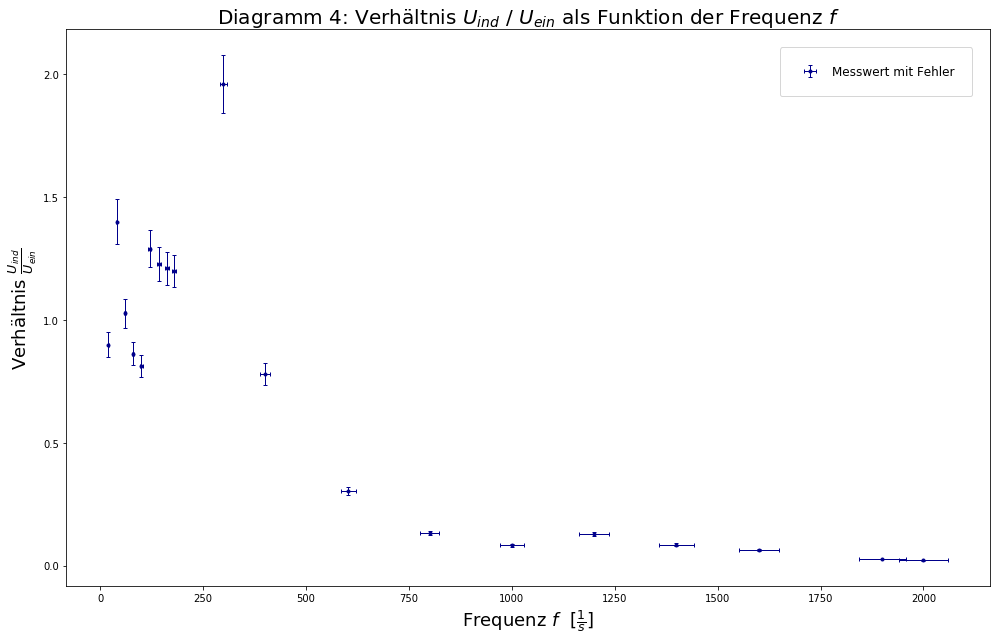

In [17]:
#plot ratio
plt.errorbar(f2,prop_U , xerr=f2_err, yerr=prop_U_err,linewidth=1,linestyle=' ',marker='.',color='darkblue', label='Messwert mit Fehler')
plt.xlabel(r'Frequenz $f$  [$\frac{1}{s}$]', size=18)
plt.ylabel(r'Verhältnis $\frac{U_{ind}}{U_{ein}}$', size=18)
plt.title(r'Diagramm 4: Verhältnis $U_{ind}\ / \ U_{ein}$ als Funktion der Frequenz $f$ ', size=20)
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)
plt.tight_layout()
plt.savefig('Diagramme/V245Diagramm4.pdf', format='PDF')

In [18]:
#current
I_s2=1e-3*np.array([1008, 630, 474, 383.9, 276.8, 232.6, 199.3, 175.0, 158.2, 142.3, 71.8, 48.26, 36.29, 29.05, 24.25, 20.84, 18.23, 16.17, 14.62])
I_s2_err=0.01*I_s2+0.00003*np.ones(len(I_s2))

#resistamce
Rs=U_ein/I_s2
Rs_err=Rs*np.sqrt((U_ein_err/U_ein)**2+(I_s2_err/I_s2)**2)

#fit linear function
popt4,pcov4=curve_fit(linear0,f2,Rs)
perr4 = np.sqrt(np.diag(pcov4))

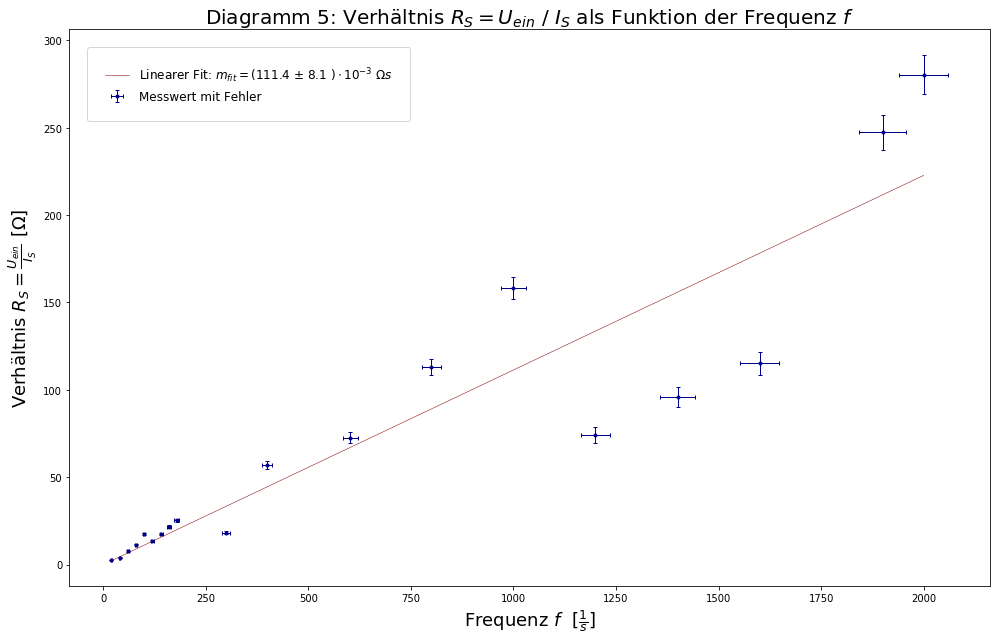

In [19]:
#plot of the ratio against the frequency
plt.errorbar(f2,Rs, xerr=f2_err, yerr=Rs_err,linewidth=1,linestyle='',marker='.',color='darkblue', label='Messwert mit Fehler')
plt.plot(f2,linear0(f2,*popt4),linewidth=0.5,color='darkred',label='Linearer Fit: $m_{fit} = ($' + str(round(popt4[0]*1e3,1)) + ' $\pm$ ' + str(round(pcov4[0,0]**0.5*1e3,1)) + r' $) \cdot10^{-3} \ \Omega s$')
plt.xlabel(r'Frequenz $f$  [$\frac{1}{s}$]', size=18)
plt.ylabel(r'Verhältnis $R_S= \frac{U_{ein}}{I_S} \ [\Omega]$', size=18)
plt.title(r'Diagramm 5: Verhältnis $R_S = U_{ein} \ / \ I_S $ als Funktion der Frequenz $f$ ', size=20)
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)
plt.tight_layout()
plt.savefig('Diagramme/V245Diagramm5.pdf', format='PDF')

In [20]:
#fit quality
chi_squared5=np.sum((linear0(f2,*popt4)-Rs)**2/Rs_err**2)
dof5=len(Rs)-1
chi_squared_red5=chi_squared5/dof5
print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared5))
print('chi_squared_red= ' + str(chi_squared_red5))
print()

prob5=round(1-chi2.cdf(chi_squared5,dof5),2)*100
print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob5) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 996.523210414
chi_squared_red= 55.3624005786

Die Fitwahrscheinlichkeit beträgt: 0.0 %


#### Induktivität der Helmholtzspule

In [21]:
#the functions graidiant is proportional the the coils inductance
L=popt4[0]/2/np.pi
L_err=perr4[0]/2/np.pi

print('Der Fit der Messwerte liefert füt die Induktivität:')
print('L = (' + str(L*1e3) + ' +/- ' + str(L_err*1e3) + ') mH')

Der Fit der Messwerte liefert füt die Induktivität:
L = (17.7244079679 +/- 1.2947665222) mH


### Teil 3: Bestimmung des Erdmagnetfeldes

#### Direktmessung des Feldes

In [22]:
#induced voltage by the magnitic field of the earth
U_ind5=0.5*1e-3*172
U_ind5_err=0.5*1e-3*2

#frequency of the coil
f3 = 15
f3_err = 0.03*f3

In [23]:
#calculated magnetic field
B_erde=U_ind5/A/f3/2/np.pi/N
B_erde_err=B_erde*np.sqrt((f3_err/f3)**2+(U_ind5_err/U_ind5)**2)
print('Das Erdmagnetfeld wird aus unserer Messung betimmt auf:')
print('B_Erde = (' + str(round(B_erde*1e6,1)) + ' +/- ' + str(round(B_erde_err*1e6,1)) + ') 10^-6 T' )

Das Erdmagnetfeld wird aus unserer Messung betimmt auf:
B_Erde = (54.7 +/- 1.8) 10^-6 T


#### Kompensationsmessung

In [24]:
#compenstion current 
I_komp=1e-3*56 
I_komp_err=1e-3*4

B_erde_v=(8*mu0*N2*I_komp)/(np.sqrt(125)*R)
B_erde_v_err=B_erde_v*(I_komp_err/I_komp)

print('Für die vertikale Komponente des Erdmagnetfeldes folgt:')
print('B_Erde_v = (' + str(round(B_erde_v*1e6,1)) + ' +/- ' + str(round(B_erde_v_err*1e6,1)) + ') 10^-6 T' )
print()

#remaining induced current
U_ind6=0.5*1e-3*71
U_ind6_err=0.5*1e-3*1

B_erde_h=U_ind6/A/f3/2/np.pi/N
B_erde_h_err=B_erde_h*np.sqrt((f3_err/f3)**2+(U_ind6_err/U_ind6)**2)
print('Für die horizontale Komponente des Erdmagnetfeldes folgt:')
print('B_Erde_h = (' + str(round(B_erde_h*1e6,2)) + ' +/- ' + str(round(B_erde_h_err*1e6,2)) + ') 10^-6 T' )

Für die vertikale Komponente des Erdmagnetfeldes folgt:
B_Erde_v = (42.3 +/- 3.0) 10^-6 T

Für die horizontale Komponente des Erdmagnetfeldes folgt:
B_Erde_h = (22.58 +/- 0.75) 10^-6 T


In [25]:
#inclination
beta=np.arctan((B_erde_v/B_erde_h))*360/(2*np.pi)
beta_err=360/(2*np.pi)*np.sqrt(((B_erde_v_err/B_erde_h)/(1+(B_erde_v/B_erde_h)**2))**2+((B_erde_v*B_erde_h_err/B_erde_h**2)/(1+(B_erde_v/B_erde_h)**2))**2)

print('Wir erhalten für den Inklinationswinkel: ')
print('Beta = (' + str(beta) + ' +/- ' + str(beta_err) + ') °')

Wir erhalten für den Inklinationswinkel: 
Beta = (61.9220393714 +/- 1.87357912657) °


#### Vergleich mit dem theoretischem Wert

In [26]:
beta_theo=65+(8/60) #literature value for the inklination in Mannheim, stated in the lab

diff_beta=np.abs(beta_theo-beta)

print('Der Vergleich mit dem Literaturwert liefert:')
print('∆beta = (' + str(diff_beta) + ' +/- ' + str(beta_err) + ') °')

Der Vergleich mit dem Literaturwert liefert:
∆beta = (3.21129396193 +/- 1.87357912657) °
